In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [3]:
BASE_DIR = '/content/drive/MyDrive/WithMask'

In [4]:
image_paths = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split(' ')
    gender = int(temp[0])
    image_paths.append(image_path)
    gender_labels.append(gender)

  0%|          | 0/206 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame()
df['image'], df['gender'] = image_paths, gender_labels
df.head()

,image,gender
0,/content/drive/MyDrive/WithMask/1 (89).png,1
1,/content/drive/MyDrive/WithMask/0 (111).png,0
2,/content/drive/MyDrive/WithMask/0 (112).png,0
3,/content/drive/MyDrive/WithMask/1 (90).png,1
4,/content/drive/MyDrive/WithMask/1 (87).png,1


<Axes: xlabel='gender'>

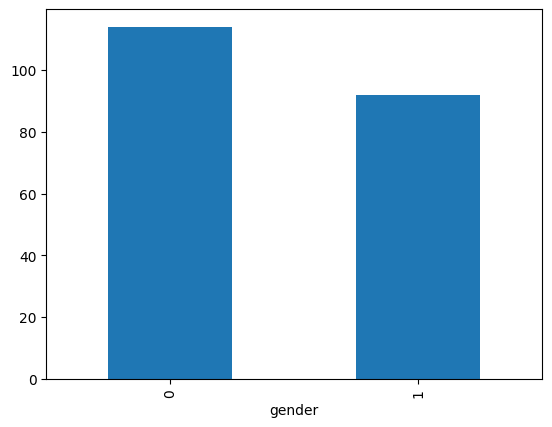

In [6]:
df.groupby('gender')['image'].count().plot(kind='bar')

In [7]:
gender_dict = {0:'Female', 1:'Male'}

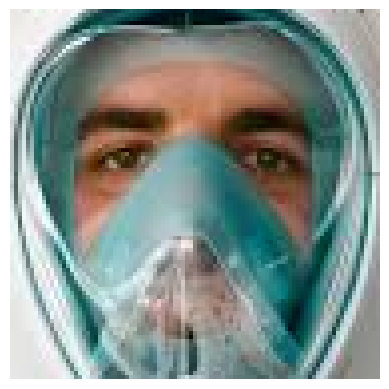

In [8]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

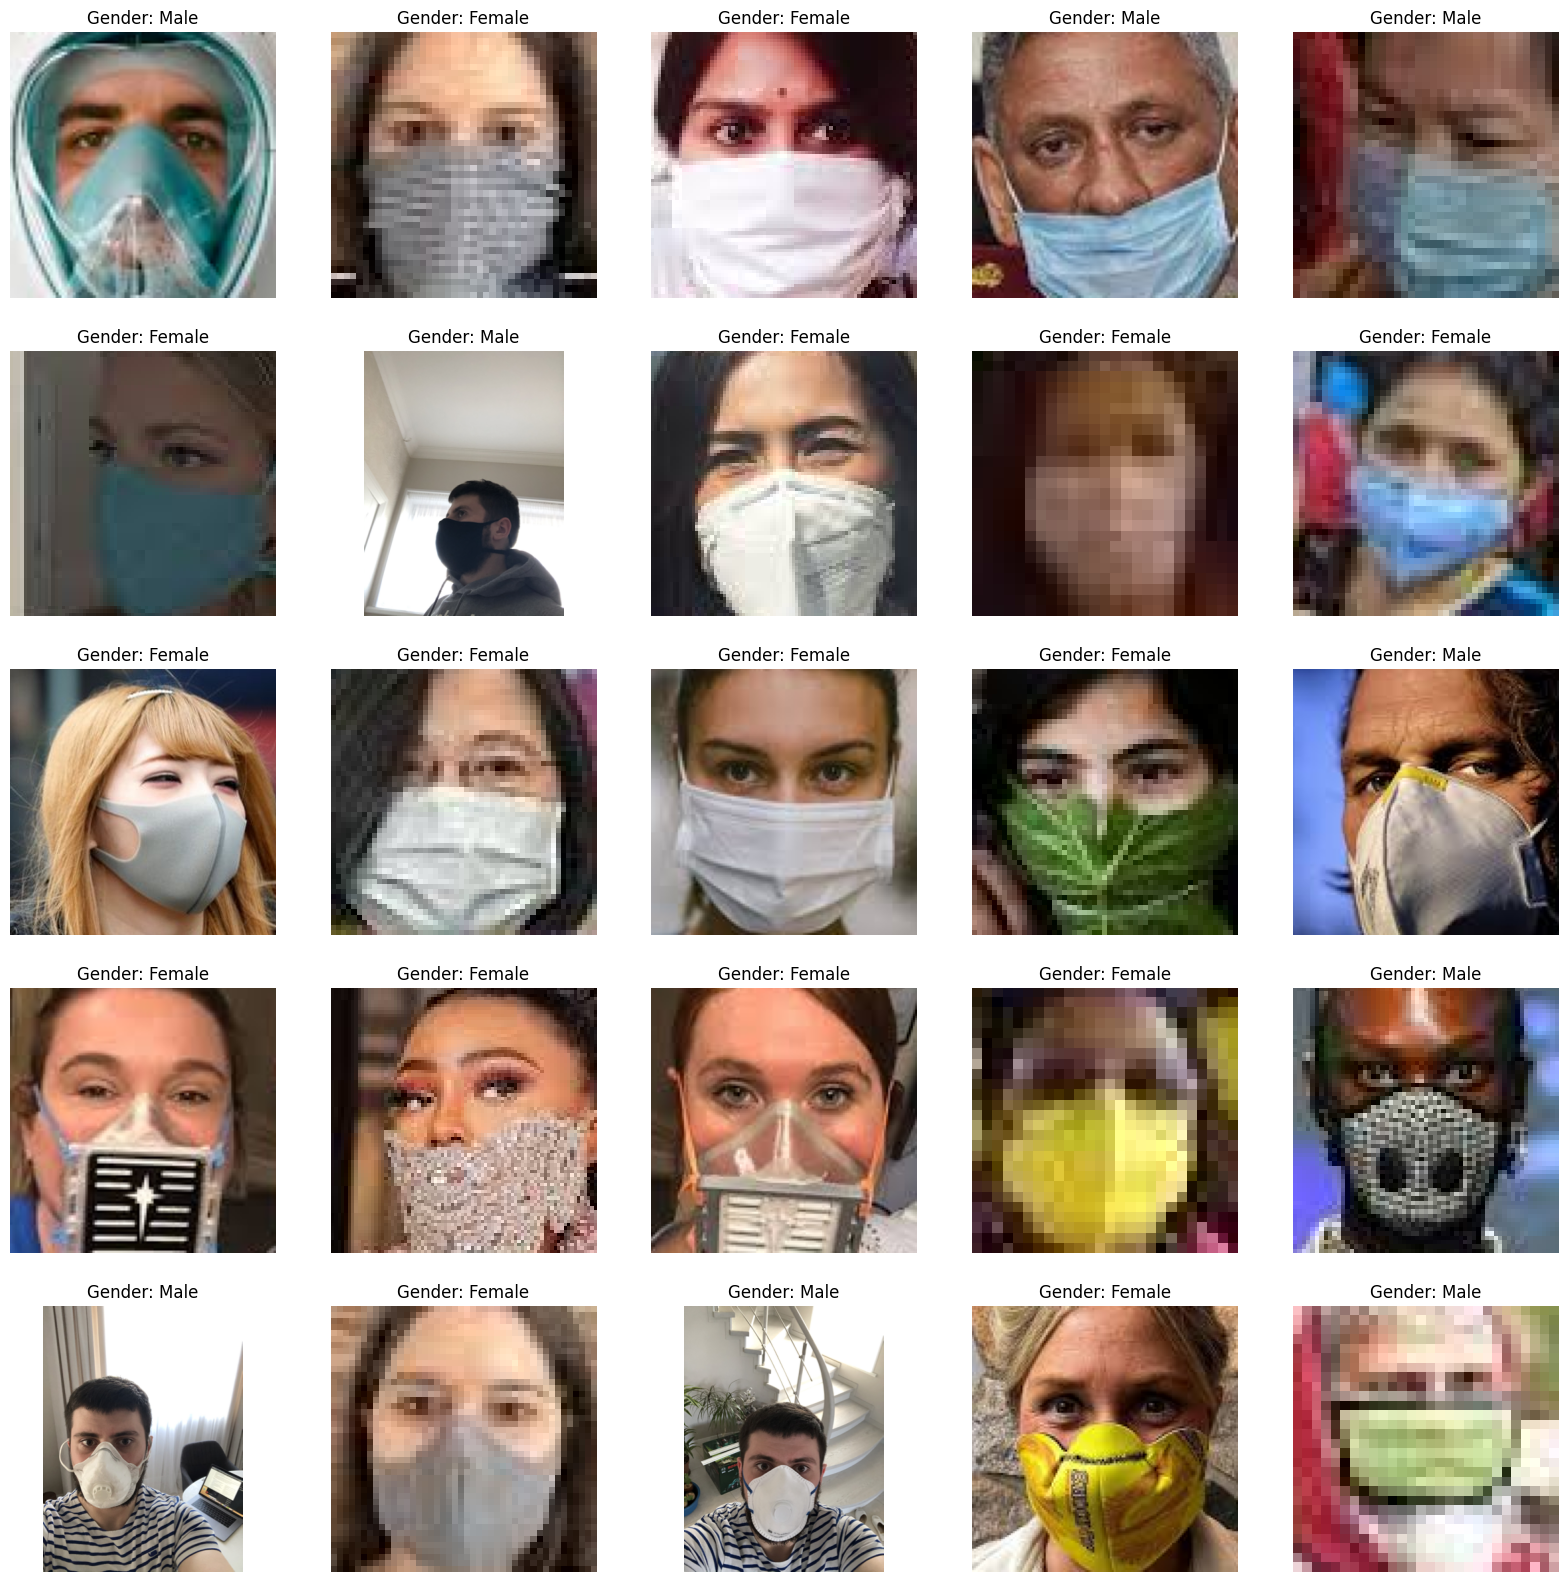

In [9]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {gender_dict[gender]}")
    plt.axis('off')

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features),128, 128, 1)
    return features

In [11]:
X = extract_features(df['image'])

  0%|          | 0/206 [00:00<?, ?it/s]

In [12]:
X.shape


(206, 128, 128, 1)

In [13]:
X = X/255.0

In [14]:
y_gender = np.array(df['gender'])
input_shape = (128, 128, 1)
print(y_gender)
print(y_gender.shape)


[1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0
 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0
 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0]
(206,)


In [15]:
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)


dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)

model = Model(inputs=[inputs], outputs=[output_1])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

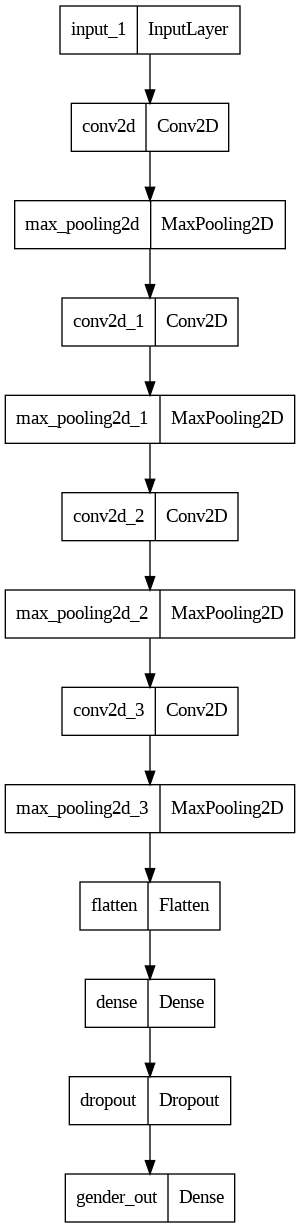

In [16]:


from tensorflow.keras.utils import plot_model
plot_model(model)



In [17]:


history = model.fit(x=X, y=y_gender, batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
6/6 [==============================] - 9s 1s/step - loss: 0.6951 - accuracy: 0.5305 - mae: 0.4908 - val_loss: 0.7226 - val_accuracy: 0.4048 - val_mae: 0.5100
Epoch 2/30
6/6 [==============================] - 8s 1s/step - loss: 0.7227 - accuracy: 0.4817 - mae: 0.5053 - val_loss: 0.6867 - val_accuracy: 0.6190 - val_mae: 0.4967
Epoch 3/30
6/6 [==============================] - 6s 934ms/step - loss: 0.6862 - accuracy: 0.5610 - mae: 0.4958 - val_loss: 0.6816 - val_accuracy: 0.6190 - val_mae: 0.4938
Epoch 4/30
6/6 [==============================] - 6s 1s/step - loss: 0.6674 - accuracy: 0.6463 - mae: 0.4839 - val_loss: 0.8175 - val_accuracy: 0.4048 - val_mae: 0.5213
Epoch 5/30
6/6 [==============================] - 8s 1s/step - loss: 0.6600 - accuracy: 0.6159 - mae: 0.4634 - val_loss: 0.6209 - val_accuracy: 0.6667 - val_mae: 0.4297
Epoch 6/30
6/6 [==============================] - 6s 979ms/step - loss: 0.5696 - accuracy: 0.7012 - mae: 0.3893 - val_loss: 0.5970 - val_accuracy: 0.690

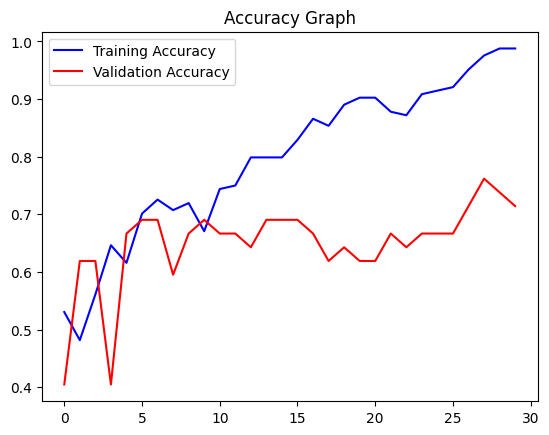

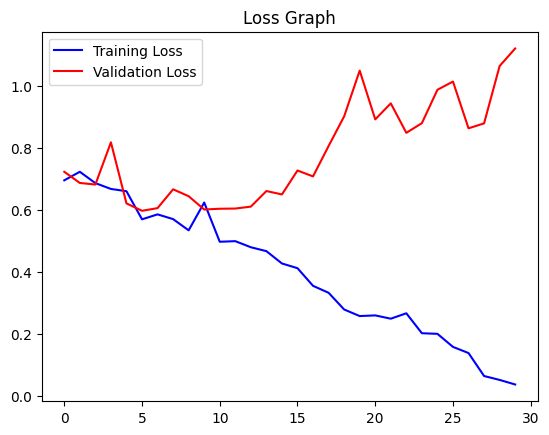

In [18]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Female
1/1 [==============================] - 0s 145ms/step
Predicted Gender: Female


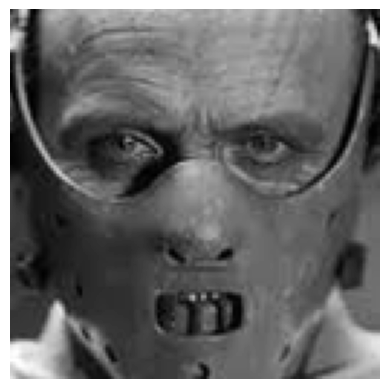

In [19]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]])


pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0])]


print("Predicted Gender:", pred_gender)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female
1/1 [==============================] - 0s 159ms/step
Predicted Gender: Male


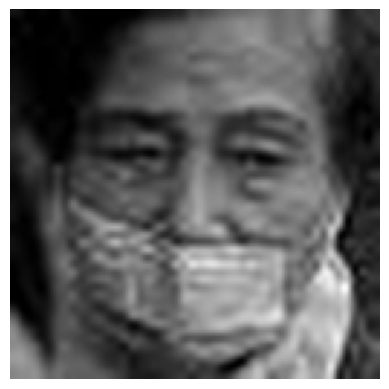

In [26]:
image_index = 201
print("Original Gender:", gender_dict[y_gender[image_index]])



pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0])]

print("Predicted Gender:", pred_gender)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');